<a href="https://colab.research.google.com/github/vardhini3103/Speech-Emotion-Recognition/blob/main/speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install librosa


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

# List contents of MyDrive to find your folder
print(os.listdir('/content/drive/MyDrive'))

['Classroom', 'HARSHA VARDHINI - 12-05-14_Jr.COIPL(Incoming)_JEE-ADV_(2013_P2)_WTA-1_KEY & SOLUTIONS', "HARSHA VARDHINI - 12-05-14_Jr.COIPL(Incoming)_JEE-ADV_(2013_P2)_WTA-1_Q'PAPER", 'imageedit_2_5346160893 (1).jpg', 'Chemical Bonding_Final (1).gdoc', 'Chemical Bonding_Final.gdoc', '1_TARGET IIT-JEE MAIN _ ADVANCED (UTM-4)_29.04.2020 (QP).gdoc', 'Untitled spreadsheet (1).gsheet', 'CBSEXII.pdf', '10th_Marksheet (1).pdf', '2.SOLUTIONS.gdoc', 'imageedit_2_5346160893.jpg', '10th_Marksheet.pdf', 'Gmail - Joint Entrance Examination (Main) - 2022 Score Card - Application No_ 220310135024 & Roll No. (Session 1)_ KK20009193 & Roll No. (Session 2)_ KK20004291.pdf', '12th_Marksheets.pdf', 'bgp-yyns-afb - Sep 14, 2022 (4).gjam', 'bgp-yyns-afb - Sep 14, 2022 (4).pdf', 'bgp-yyns-afb - Sep 14, 2022 (3).gjam', 'bgp-yyns-afb - Sep 14, 2022 (3).pdf', 'bgp-yyns-afb - Sep 14, 2022 (2).gjam', 'bgp-yyns-afb - Sep 14, 2022 (2).pdf', 'bgp-yyns-afb - Sep 14, 2022 (1).gjam', 'bgp-yyns-afb - Sep 14, 2022 (1).pd

# New Section

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Trainer, TrainingArguments, Wav2Vec2ForSequenceClassification

import warnings
warnings.filterwarnings('ignore')

In [8]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [9]:
len(paths)

1960

In [10]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_bone_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_bath_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_bought_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_back_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_burn_disgust.wav']

In [11]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [12]:
## Create a dataframe
df = pd.DataFrame()
df['audio_paths'] = paths
df['labels'] = labels
df.head()

,audio_paths,labels
0,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
1,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
2,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
3,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
4,/content/drive/MyDrive/TESS Toronto emotional ...,disgust


In [13]:
df['labels'].value_counts()

,count
labels,
sad,400
ps,400
neutral,360
disgust,200
happy,200
fear,200
angry,200


<Axes: xlabel='labels', ylabel='count'>

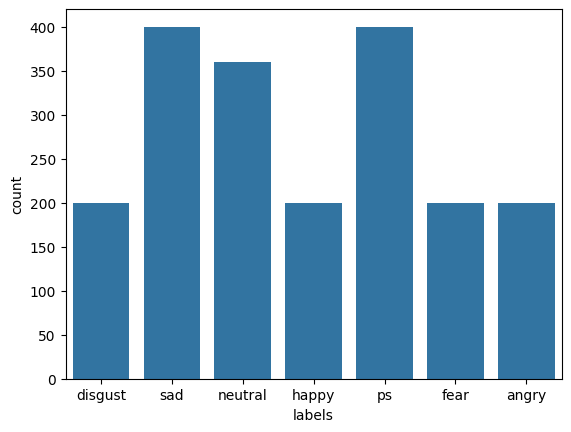

In [14]:
sns.countplot(data=df, x='labels')

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

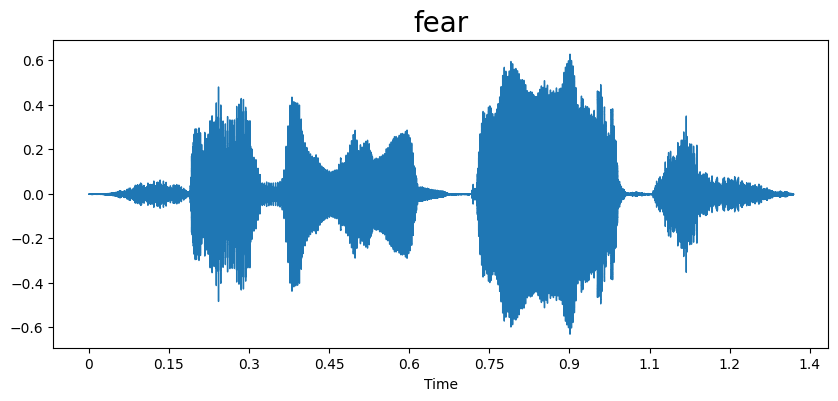

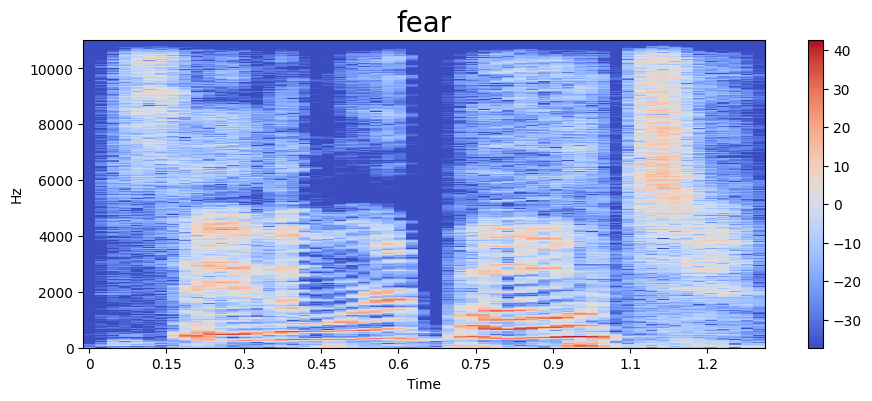

In [16]:
emotion = 'fear'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

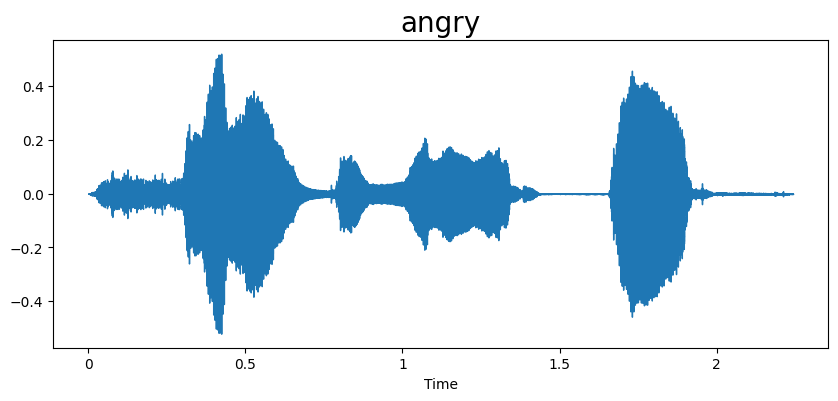

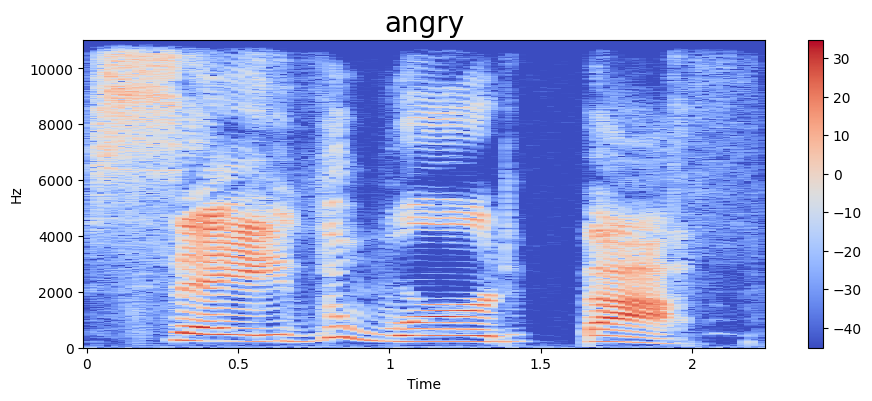

In [17]:
emotion = 'angry'
path = np.array(df['audio_paths'][df['labels']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

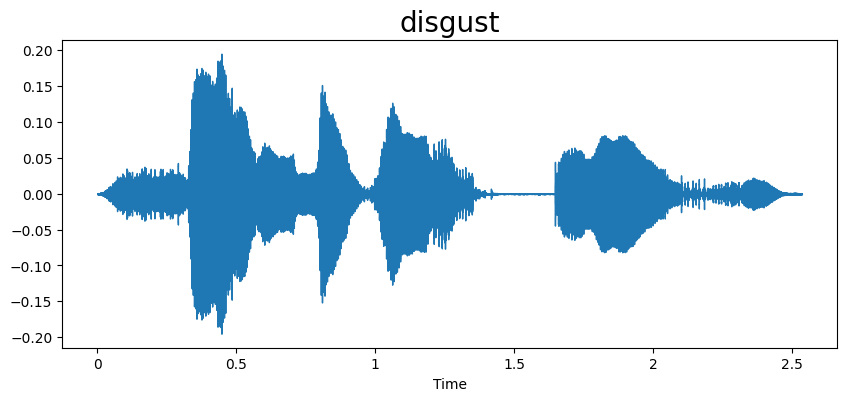

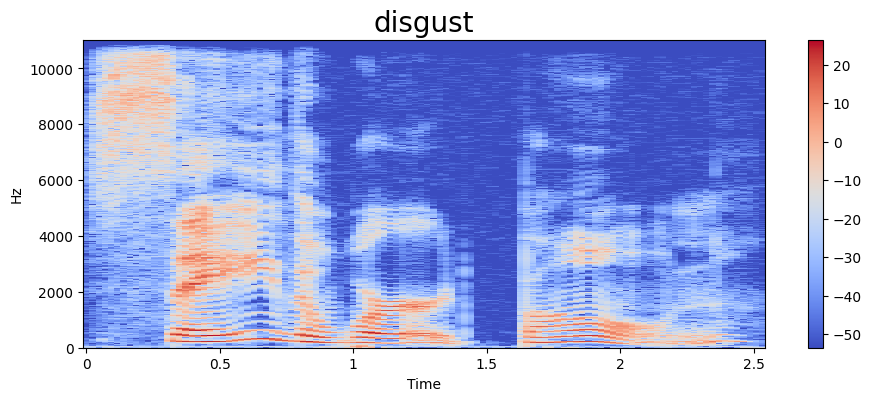

In [18]:
emotion = 'disgust'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

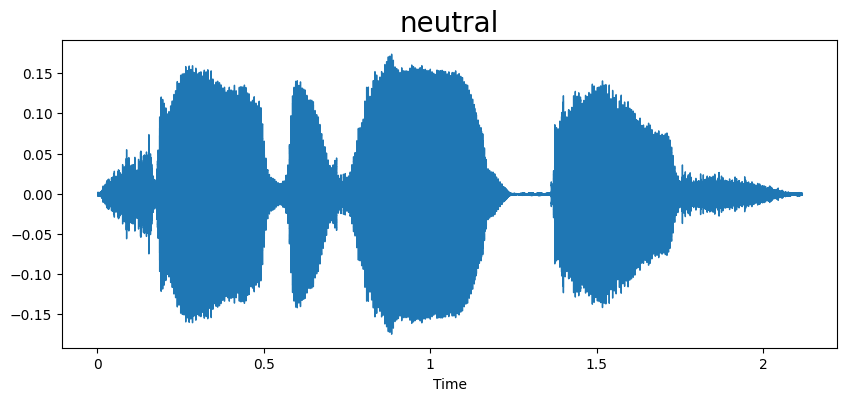

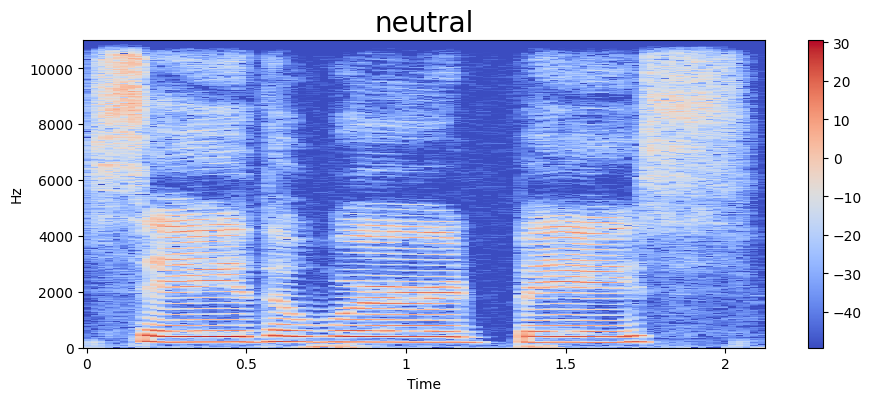

In [19]:
emotion = 'neutral'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

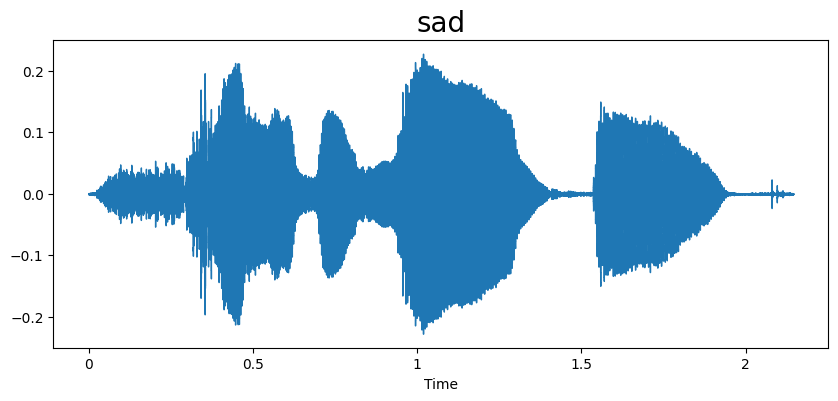

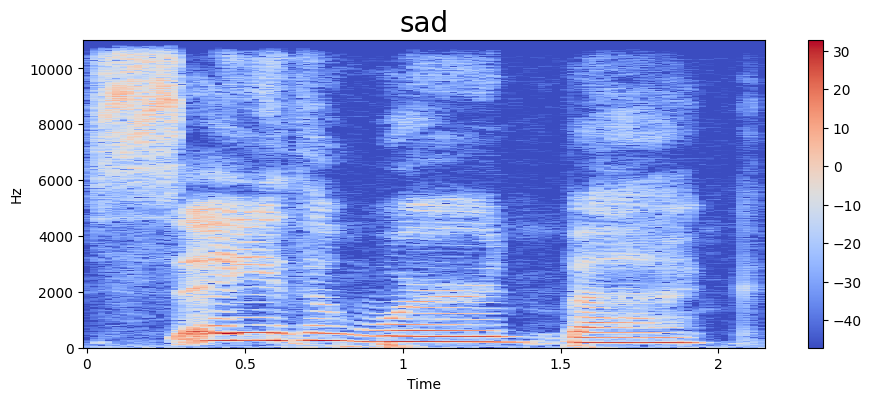

In [20]:
emotion = 'sad'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

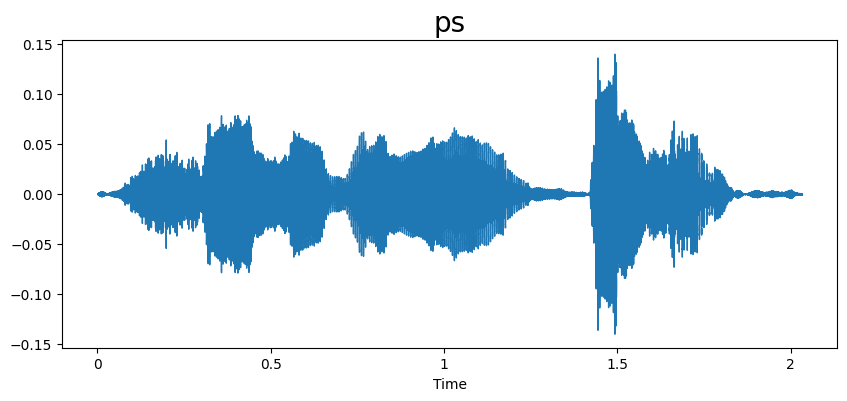

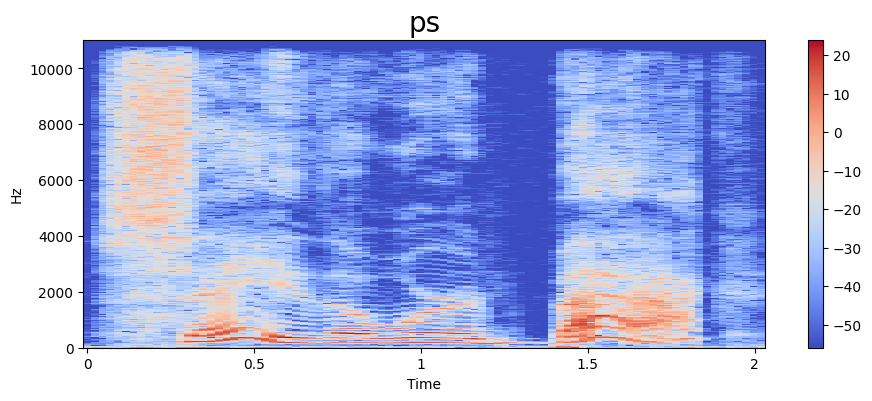

In [21]:
emotion = 'ps'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

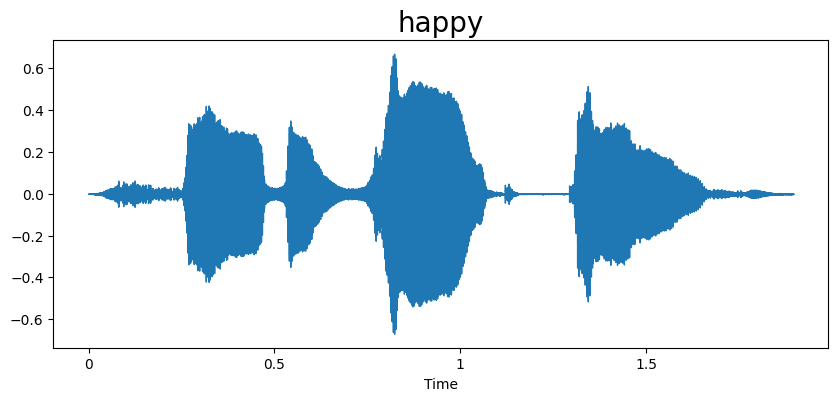

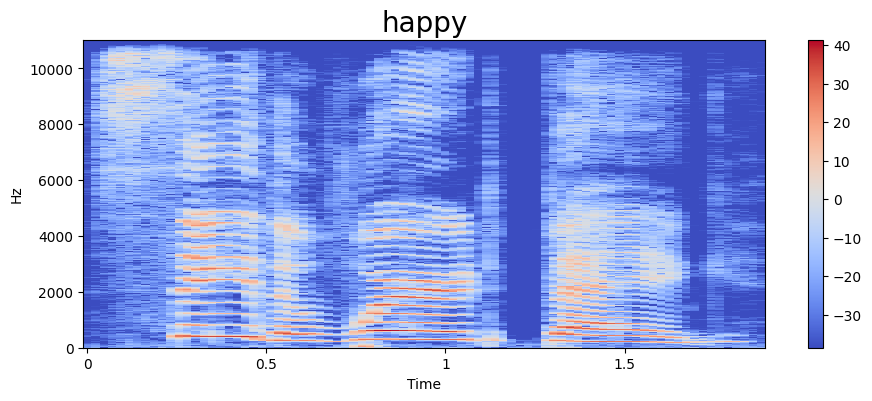

In [22]:
emotion = 'happy'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [23]:
label_map = {label:idx for idx, label in enumerate(df['labels'].unique())}
inverse_label_map = {idx: label for label, idx in label_map.items()}
df['labels'] = df['labels'].map(label_map)
df.head(2)

,audio_paths,labels
0,/content/drive/MyDrive/TESS Toronto emotional ...,0
1,/content/drive/MyDrive/TESS Toronto emotional ...,0


In [24]:
class SpeechEmotionDataset(Dataset):
    def __init__(self, df, processor, max_length=32000):
        self.df = df
        self.processor = processor
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        audio_path = self.df.iloc[idx]['audio_paths']
        label = self.df.iloc[idx]['labels']


        #load the audio file
        speech, sr = librosa.load(audio_path, sr=16000)


        if len(speech) > self.max_length:
            speech = speech[:self.max_length]
        else:
            speech = np.pad(speech, (0, self.max_length - len(speech)), 'constant')

        inputs = self.processor(speech, sampling_rate=16000, return_tensors='pt', padding=True, truncate=True, max_length=self.max_length)

        input_values = inputs.input_values.squeeze()
        return{'input_values': input_values, 'labels': torch.tensor(label, dtype=torch.long)}

In [25]:
#split the data for training and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [26]:
#initialize the processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/wav2vec2-base", num_labels=7)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
#load the dataset
train_dataset = SpeechEmotionDataset(train_df, processor)
test_dataset = SpeechEmotionDataset(test_df, processor)

In [28]:
# create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [29]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to=[]
)

In [30]:
# create functions for computing metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [31]:
# initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
trainer.train()

Keyword argument `truncate` is not a valid argument for this processor and will be ignored.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.720946,1.000000,1.000000,1.000000,1.000000
2,No log,0.323500,1.000000,1.000000,1.000000,1.000000
3,No log,0.262630,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=294, training_loss=0.7627768484102625, metrics={'train_runtime': 1051.2837, 'train_samples_per_second': 4.475, 'train_steps_per_second': 0.28, 'total_flos': 8.5412936448e+16, 'train_loss': 0.7627768484102625, 'epoch': 3.0})

In [32]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.2626299262046814, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 8.1971, 'eval_samples_per_second': 47.822, 'eval_steps_per_second': 3.05, 'epoch': 3.0}


In [34]:
import random
idx = random.randrange(0, len(test_dataset))
print("Original Label:", int(test_dataset[idx]['labels']))
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')

with torch.no_grad():
  outputs = model(input_values)
logits = outputs.logits

predicted_class = logits.argmax(dim=-1).item()
print('Predicted Label:', inverse_label_map[predicted_class])

Original Label: 1
Predicted Label: sad
